In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
# import dash
import plotly.graph_objs as go
# code to set option to display all columns taken from this article: https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('./data/transformed/mm_wgi_fiw.csv')

In [123]:
df.columns

Index(['country_name', 'ccode', 'year', 'region', 'protestnumber',
       'protesterviolence', 'participants_category', 'stateresponse1',
       'start_date', 'end_date', 'duration', 'labor wage dispute',
       'land farm issue', 'police brutality', 'political behavior, process',
       'price increases, tax policy', 'removal of politician',
       'social restrictions', 'CC.EST', 'GE.EST', 'PV.NO.SRC', 'RL.EST',
       'VA.EST', 'fiw_status'],
      dtype='object')

In [130]:
df.groupby(by = 'stateresponse1')['labor wage dispute',
       'land farm issue', 'police brutality', 'political behavior, process',
       'price increases, tax policy', 'removal of politician',
       'social restrictions'].mean()

<ipython-input-130-6b66e130504f>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions
stateresponse1,,,,,,,
accomodation,0.204409,0.078156,0.062124,0.535070,0.118236,0.176353,0.050100
arrests,0.069930,0.041958,0.071678,0.753497,0.094406,0.089161,0.047203
beatings,0.112245,0.061224,0.102041,0.632653,0.081633,0.122449,0.061224
crowd dispersal,0.126427,0.047780,0.117970,0.756871,0.106131,0.219873,0.032981
ignore,0.141957,0.048369,0.061192,0.717885,0.081890,0.129134,0.066817
killings,0.017391,0.052174,0.139130,0.721739,0.095652,0.130435,0.078261
shootings,0.064655,0.025862,0.159483,0.698276,0.086207,0.215517,0.012931
unknown,0.416667,0.083333,0.083333,0.583333,0.166667,0.166667,0.166667


In [132]:
df.groupby(by = 'stateresponse1')['CC.EST', 'GE.EST', 'PV.NO.SRC', 'RL.EST',
       'VA.EST', 'fiw_status'].median()

<ipython-input-132-544b4d6eba37>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,CC.EST,GE.EST,PV.NO.SRC,RL.EST,VA.EST
stateresponse1,,,,,
accomodation,-0.514938,-0.301507,8.0,-0.488233,-0.218955
arrests,-0.536476,-0.193249,8.0,-0.651298,-0.883594
beatings,-0.766187,-0.554849,7.0,-0.754716,-1.083014
crowd dispersal,-0.561732,-0.413859,8.0,-0.488233,-0.308442
ignore,-0.300416,0.007411,8.0,-0.170176,0.006508
killings,-0.804220,-0.778967,7.0,-0.715842,-0.763609
shootings,-1.007903,-0.964174,7.0,-0.974337,-1.013889
unknown,-0.344728,-0.379961,7.0,-0.676570,-0.143551


/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='start_date', ylabel='CC.EST'>

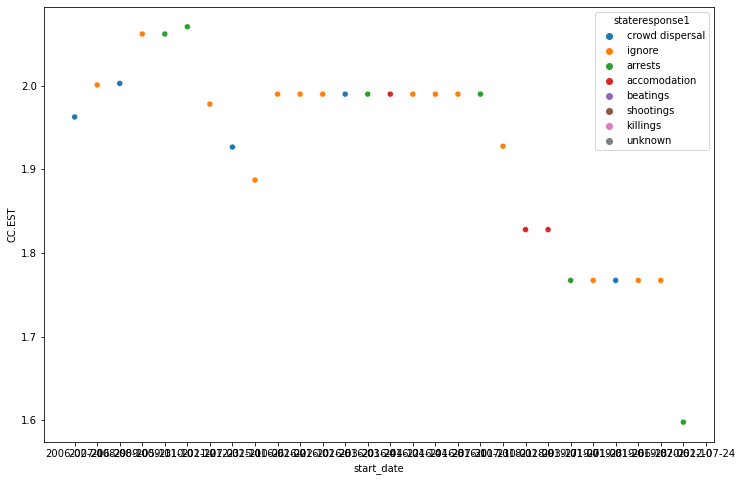

In [120]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['start_date'], df[df['country_name']=='Canada']['CC.EST'], hue=df['stateresponse1'])

In [7]:
df_2006 = df[df['year'] == 2020]

In [8]:
df['country_name'].unique()


array(['Canada', 'Cuba', 'Haiti', 'Dominican Republic (the)', 'Jamaica',
       'Mexico', 'Guatemala', 'Honduras', 'El Salvador', 'Nicaragua',
       'Costa Rica', 'Panama', 'Colombia',
       'Venezuela (Bolivarian Republic of)', 'Guyana', 'Suriname',
       'Ecuador', 'Peru', 'Brazil', 'Bolivia (Plurinational State of)',
       'Paraguay', 'Chile', 'Argentina', 'Uruguay',
       'United Kingdom of Great Britain and Northern Ireland (the)',
       'Ireland', 'Netherlands (the)', 'Belgium', 'France', 'Switzerland',
       'Spain', 'Portugal', 'Germany', 'Poland', 'Austria', 'Hungary',
       'Czech Republic (the)', 'Slovakia', 'Italy', 'Albania', 'Kosovo',
       'Serbia', 'the former Yugoslav Republic of Macedonia', 'Croatia',
       'Bosnia and Herzegovina', 'Montenegro', 'Slovenia', 'Greece',
       'Cyprus', 'Bulgaria', 'Republic of Moldova (the)', 'Romania',
       'Russian Federation (the)', 'Estonia', 'Latvia', 'Lithuania',
       'Ukraine', 'Belarus', 'Armenia', 'Georgia', 'Aze

In [9]:
data = {
    'type' : 'choropleth',
    'locations' : df['country_name'],
    'locationmode':'country names',
    'colorscale' : 'viridis',
    'z':df['CC.EST']}

In [10]:
map = go.Figure(data=[data])
plotly.offline.plot(map)

'temp-plot.html'

In [11]:
df.resample('YS').sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [100]:
def time_series_by_country(df = df, country_or_region = 'country', place = 'Mali', agg_method = 'sum', interval = 'YS'):

    '''
    A function to downsample the full dataframe to view data by country. 
    Date range will include all years for which data is available for a specified country. 
    Input:
        * a dataframe - defaults to 'df'
        * specify country or region - in order to view data by region
        * place - country or region name
        * agg_method - aggregation method for resampling. defaults to 'sum'. 'mean' also recommended. 
        * interval - 'YS': annual / 'MS': monthly 
        
    '''
    try:
        # generate downsamples dataframe based on country/region selection
        if country_or_region == 'country':
            output_df = df[df['country_name'] == place.title()]

        elif country_or_region == 'region':
            output_df = df[df['region'] == place.title()]


        #set index to date_time based on protest startdate
        output_df = output_df.sort_values(by='start_date')
        output_df.set_index(pd.DatetimeIndex(output_df['start_date']), inplace=True)

        #specify date range if desired
        start_date = str(output_df.index.min())[:4]
        end_date = str(output_df.index.max())[:4]
        output_df = output_df.loc[start_date:end_date]

        # resample to look at data based on regular intervals
        output_df.resample(interval).agg(agg_method)

        output_df.drop(columns = ['year', 'end_date', 'ccode'], inplace=True)
        return output_df

    except: 

        print(f'We don\'t have enough data to fulfill your request for {place}. Please check your spelling, or try another location.')




In [114]:
def generate_timeline(df, metric = "GE.EST"):
    sns.lineplot(x=df.index, y=df[metric]), hue=df['protest_number'])

<AxesSubplot:xlabel='start_date', ylabel='GE.EST'>

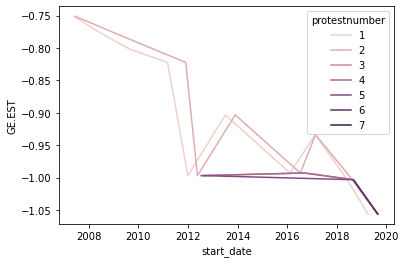

In [119]:
sns.lineplot(x=mali.index, y=mali["GE.EST"], hue=mali['protestnumber'])